In [1]:
import pandas as pd
import matplotlib as pyplot
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
# Reference csv file paths
movie_return_path = "movie_return.csv"
review_path = "book_to_film_adaptations.csv"
movies_path = "Raw_Data/movies_metadata.csv"

# Import csv files as DataFrames

movie_return = pd.read_csv(movie_return_path, encoding="utf-8")
reviews = pd.read_csv(review_path, encoding="utf-8")
movies_df = pd.read_csv(movies_path, encoding="utf-8")

In [5]:
subset = movie_return[['book publisher', 'movie return']]
grouped_df = subset.groupby('book publisher').mean('movie return')
grouped_df.sort_values(by = ['movie return'], ascending=False, inplace = True)
grouped_df.reset_index(inplace = True)
grouped_df.head(1)

,book publisher,movie return
0,Pocket Books,18.777778


Of the 50 book-to-movie adaptations with revenue data, 41 were published by unique publishers. There are only a handful of book publishers who enjoyed the success of more than one book becoming a film. Penguin Books is an outlier, with four books published over the years: The Scarlet Letter, The Joy Luck Club, On the Road & Wuthering Heights.   

Publishers Pocket Books, British Film Institute & W. W. Norton & Company brought the greatest ROI to movie companies through their books, eventually made into the films: "Carrie", "The Silence of the Lambs", "Wizard of Oz" and "Sense and Sensibility" respectively. 	

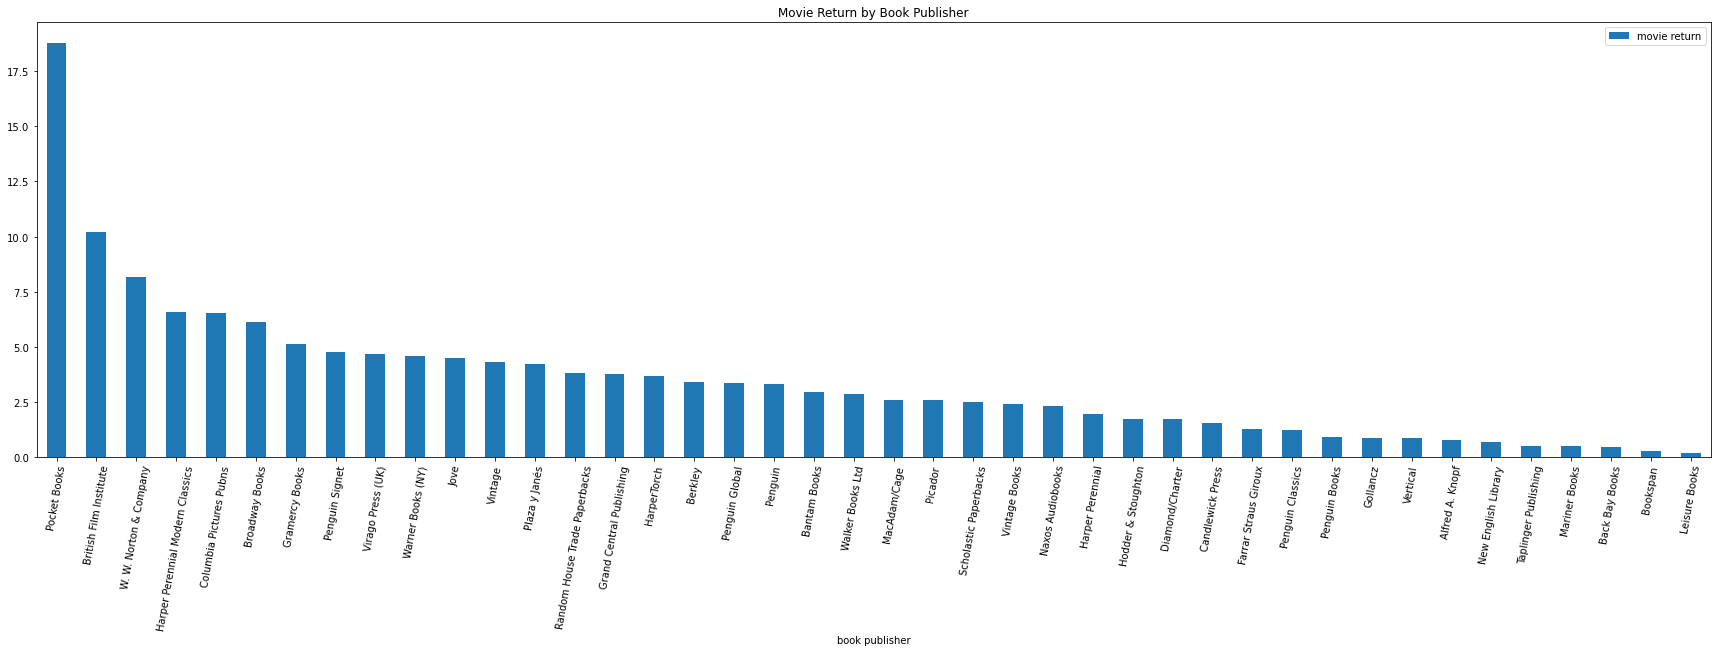

In [6]:
# Visualize publisher data vs. movie return
grouped_df.plot('book publisher', 'movie return', kind='bar', figsize=(30,8), rot=80)
plt.title('Movie Return by Book Publisher');

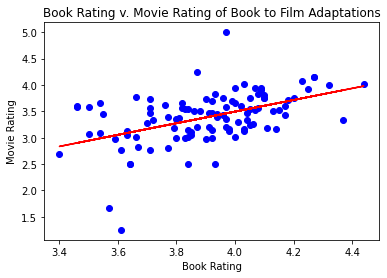

The r-value is: 0.4813170546977566


In [8]:
# Determine x & y values
x_values = grouped_reviews['book rating']
y_values = grouped_reviews['movie rating']

 # Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot scatter
plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Book Rating')
plt.ylabel('Movie Rating')
marker_size=20
plt.title('Book Rating v. Movie Rating of Book to Film Adaptations')
plt.show()
#H1: r2 != 0 (correlation)
#H0: r2 = 0 (no correlation)

# Print r value
print(f"The r-value is: {rvalue}")
# For further evaluation

Looking at the graph, there is a positive correlation between book and movie rating. Because the rvalue is .4, a positive correlation exists, but it is not strong. 48% of the variability in movie ratings of adaptations is explained by the book rating, assuming that all assumptions of OLS is true. This shows that there are other factors influencing the book rating that we would have to build into our model as well. 

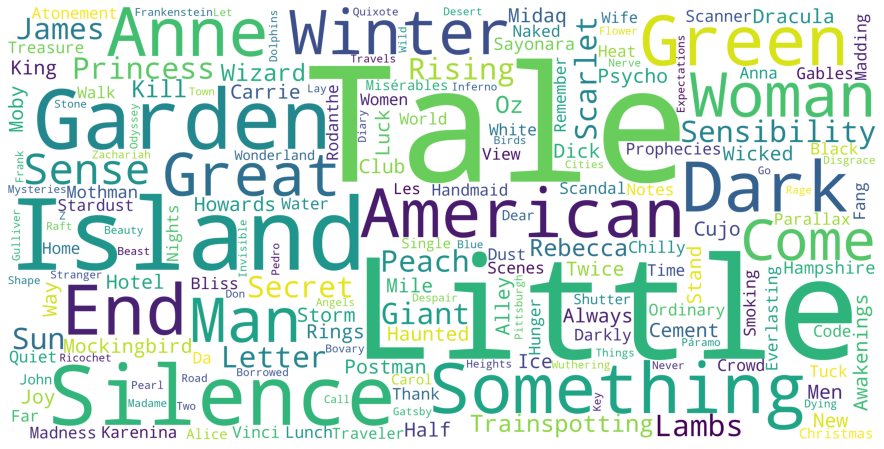

In [10]:
# Wordcloud on movie title for adaptations
# conda install -c conda-forge wordcloud
reviews['movie title'] = reviews['movie title'].astype('str')
title_group = ' '.join(reviews['movie title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_group)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
# Save the figure
plt.savefig("title_wordcloud_adaptations.png")
# Visualize
plt.show()

The wordcloud for film adaptations shows that 'Little', 'Garden', 'Island', 'Tale' are commonly occuring words. This shows that key themes like adventure, nature and the hero archetype are present in most film adaptations.

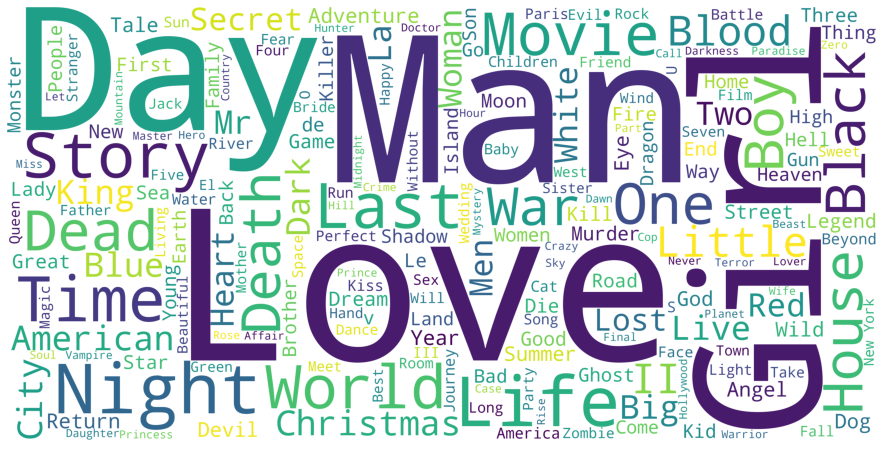

In [11]:
# Wordcloud on movie title for all films
movies_df['title'] = movies_df['title'].astype('str')
title_group = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_group)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
# Save the figure
plt.savefig("title_wordcloud.png")
# Visualize
plt.show()

The wordcloud for all films shows that 'Love', 'Girl' and 'Man' are commonly occuring words. This shows that, unsurprisingly, most films are centered around themes like romance and love. 

## Hypothesis 1: Book to Film Adaptations have higher ratings than most films.

#### Steps to prove hypothesis: 
1. Create a box and whisker plot for review scores of adaptations compared to review scores of all movies
2. Calculate means for adaptation reviews (sample) & all movie reviews (population)
3. Get pvalue: if pvalue < .05 then we reject H0
4. population df = movies_df[vote_average]
6. sample df = reviews['vote_average']

Hypotheses: 
- H0: x(adaptations) = x(population)
- H1: x(adaptations) != x(population)


In [16]:
# Create subsets of data for plotting, and rename columns
imdb_votes_reviews = reviews[['movie title', 'vote_average']]
imdb_votes_reviews = imdb_votes_reviews.rename(columns = {'vote_average': 'Adaptation Films'})

imdb_votes_movies = movies_df[['title', 'vote_average']]
imdb_votes_movies = imdb_votes_movies.rename(columns = {'title': "movie title", 
                                                        'vote_average': 'All Films'})

In [17]:
# Merge dfs on 'movie title'
votes_merge = pd.merge(imdb_votes_movies, imdb_votes_reviews,  how = 'left', on = 'movie title')
votes_merge = votes_merge[['Adaptation Films', 'All Films']]

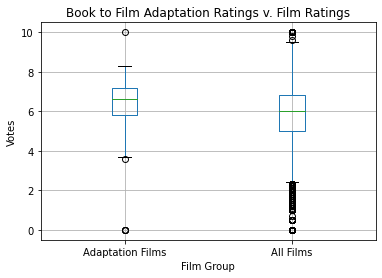

In [19]:
# Generate a box plot of adaptation votes v. total votes, based on IMBD votes
plt.title('Book to Film Adaptation Ratings v. Film Ratings')
plt.ylabel('Votes')
plt.xlabel('Film Group')
votes_merge.boxplot(column=["Adaptation Films", "All Films"])
# Save the figure
plt.savefig("ratings_box_plot.png")
# Visualize
plt.show()

Ratings for Adaptation Films (~7) have a slightly higher mean than All Films (~6). Looking at the box and whisker plot, ratings for All Films vary more widely, with more outliers, than ratings for Adaptation Films. The range of ratings for Adaptation Films is much smaller, with a tighter min and max. This shows that Adaptation Films are more likely to be rated successfully.

Assumptions for p-value:
- Data is normally distributed
- Data is independent
- Data is randomly sampled

In [20]:
# Function to plot data and define sample v. population
def moviedata(loc=0):
    sample = votes_merge['Adaptation Films']
    population = votes_merge['All Films']

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

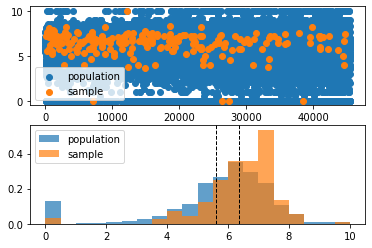

In [21]:
# Plot moviedata in scatter and histogram
population, sample = moviedata()

Looking at the scatter plot, the sample is a good representation of the population, although the sample ratings are primarily between 5 & 10, whereas the population ratings have a much wider variance. Looking at the histogram, data is normally distributed. The greatest frequency for sample is ~7, whereas the greatest frequency for population is closer to 6. 

In [22]:
# Drop NaN values from sample for t-test
sample.dropna(inplace = True)

In [23]:
# Run one sample t-test where significance value is .05
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=8.333635521004798, pvalue=8.03194619929397e-15)

The p-value is small, less than .05. This shows that our null hypothesis is rejected, and proves that adaptations are not equal to all films. Their means are different. These tests prove our hypothesis that Book to Film Adaptations have higher ratings than most films.

## Hypothesis 2: Horror Adaptations have higher ratings than other genres of Film Adaptations.

#### Steps to prove hypothesis: 
1. Groupby genre & rating
2. Create a bar chart to find top genres based on reviews
3. Create a box and whisker plot for review scores of horror adaptations compared to other genres of adaptations 
4. Find ANOVA for top three highly rated genres 
5. Get pvalue: if pvalue < .05 then we reject H0
Use: 
- population1 = reviews['movie genre] == 'thriller'
- population2 = reviews['movie genre'] == 'horror'
- population3 = reviews['movie genre'] == 'family'

#### Hypotheses:
- H0: x(adaptations) = x(population)
- H1: x(adaptations) != x(population)

In [26]:
reviews.head(2)

,Unnamed: 0,id,movie keywords,movie budget,movie genre,movie original language,movie release date,movie revenue,movie runtime,movie spoken languages,vote_average,movie title,movie rating,book authors,book rating,book pages,book publisher,book ratings sum,movie return
0,0,4584,"[{'id': 420, 'name': 'bowling'}, {'id': 818, '...",16500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.2,Sense and Sensibility,3.95,Jane Austen/Claudia L. Johnson,4.07,269,W. W. Norton & Company,1773,8.181818
1,1,10533,"[{'id': 818, 'name': 'based on novel'}, {'id':...",50000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,1995-10-13,10382407.0,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.5,The Scarlet Letter,2.69,Nathaniel Hawthorne/Thomas E. Connolly/Nina Baym,3.40,279,Penguin Books,11030,0.207648


In [117]:
# Get values from nested dict
genre_val = reviews['movie genre'].values[0]
genre_val
#Idx = reviews.set_index(['movie genre'])['movie rating'].apply(pd.Series).stack().index
#pd.DataFrame(reviews.set_index(['movie genre'])['movie rating'].apply(pd.Series).stack().values.tolist(),index=Idx).reset_index()

"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"

In [125]:
reviews.shape

(105, 19)

In [124]:
#drama = reviews[[['movie genre'].values[0] in row for row in reviews['movie genre']]]
drama = reviews[['Drama' in row for row in reviews['movie genre']]]
drama.shape

(83, 19)

In [114]:
x = reviews.iloc[:, :-1].values.repeat(reviews['movie genre'].apply(len), 0)
y = reviews['movie genre'].apply(pd.Series).stack().values.reshape(-1, 1)
out = pd.DataFrame(np.hstack((x, y)), columns=df.columns)
print(out)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 7559 and the array at index 1 has size 105

In [108]:
genres = reviews['movie genre'].explode('movie genre')
genres

0      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
1      [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
2      [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
3      [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
4      [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
                             ...                        
100                     [{'id': 53, 'name': 'Thriller'}]
101    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...
102                    [{'id': 12, 'name': 'Adventure'}]
103    [{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...
104    [{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...
Name: movie genre, Length: 105, dtype: object

In [ ]:
# Create a boxplot to compare means
df.boxplot("mosq", by="treatment", figsize=(20, 10))